# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Introdução a Deep Learning com TensorFlow</font>

Problema de Negócio:

Construir um modelo de Inteligência Artificial capaz de classificar imagens considerando 10 categorias: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']. Dada uma nova imagem de uma dessas categorias o modelo deve ser capaz de classificar e indicar o que é a imagem.

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

https://www.tensorflow.org/

**ATENÇÃO**: O TensorFlow pode apresentar problemas em algumas versões de sistema operacional. Verifique a documentação oficial no link acima.

In [ ]:
# Instala o TF
!pip install -q tensorflow==2.12

In [1]:
# Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [122]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

## Carregando os Dados

https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

In [4]:
# Clases das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Pré-Processamento e Visualização das Imagens

In [5]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [6]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

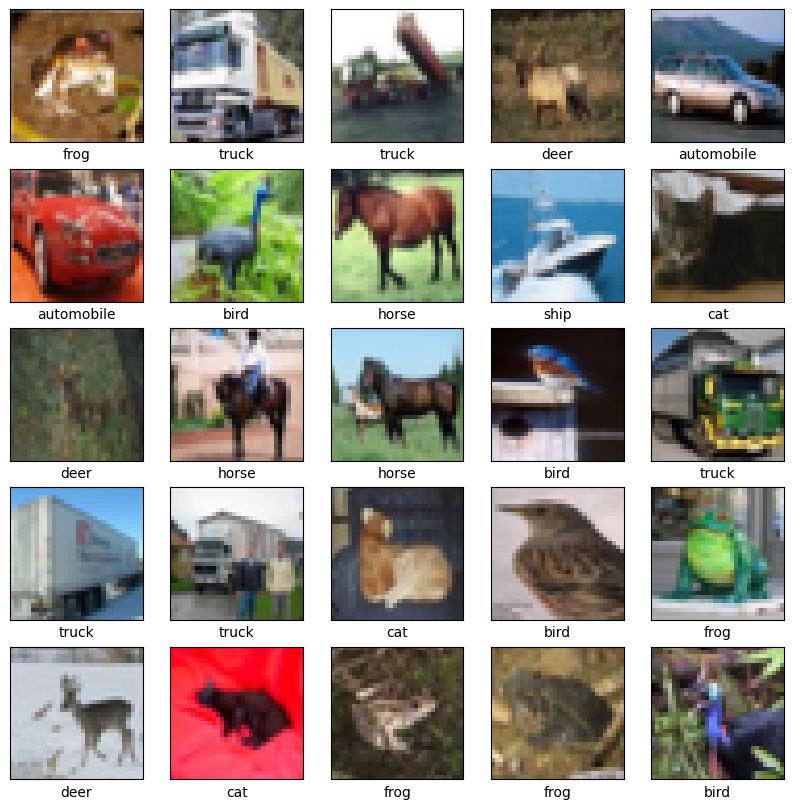

In [7]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

# Construção do Modelo

In [24]:
# Modelo

# Cria o objeto de sequência de camadas
modelo_dsa = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_dsa.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

# Adicione a segunda camada convolucional
modelo_dsa.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
modelo_dsa.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Adicione a terceira camada convolucional
modelo_dsa.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
modelo_dsa.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [25]:
# Adicionar camadas de classificação
modelo_dsa.add(layers.Flatten())
modelo_dsa.add(layers.Dense(64, activation = 'relu'))
modelo_dsa.add(layers.Dense(10, activation = 'softmax'))

In [26]:
# Sumário do modelo
modelo_dsa.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 2, 2, 128)      

In [27]:
# Compilação do modelo
modelo_dsa.compile(optimizer = 'adam', 
                   loss = 'sparse_categorical_crossentropy', 
                   metrics = ['accuracy'])

In [28]:
%%time
history = modelo_dsa.fit(imagens_treino, 
                         labels_treino, 
                         epochs = 10, 
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 184s 115ms/step - loss: 1.5544 - accuracy: 0.4299 - val_loss: 1.2849 - val_accuracy: 0.5347
Epoch 2/10
1563/1563 [==============================] - 220s 141ms/step - loss: 1.1670 - accuracy: 0.5863 - val_loss: 1.1333 - val_accuracy: 0.6057
Epoch 3/10
1563/1563 [==============================] - 187s 120ms/step - loss: 1.0184 - accuracy: 0.6436 - val_loss: 0.9946 - val_accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 180s 115ms/step - loss: 0.9182 - accuracy: 0.6805 - val_loss: 0.9963 - val_accuracy: 0.6562
Epoch 5/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.8425 - accuracy: 0.7060 - val_loss: 0.9260 - val_accuracy: 0.6793
Epoch 6/10
1563/1563 [==============================] - 189s 121ms/step - loss: 0.7922 - accuracy: 0.7249 - val_loss: 0.8708 - val_accuracy: 0.7006
Epoch 7/10
1563/1563 [==============================] - 195s 125ms/step - loss: 0.7407 - accuracy: 0.7415 - val_

## Avaliação do Modelo

In [29]:
# Avalia o modelo
erro_teste, acc_teste = modelo_dsa.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 9s - loss: 0.9000 - accuracy: 0.7051 - 9s/epoch - 29ms/step


In [30]:
print('\nAcurácia com Dados de Teste:', acc_teste)


Acurácia com Dados de Teste: 0.7050999999046326


## Deploy do Modelo

Deploy do modelo é estudado especialmente na <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-de-machine-learning">Formação Engenheiro de Machine Learning</a>.

In [116]:
def image_preprocessing(image):
    
    # Exibir a imagem
    plt.figure(figsize = (2,2))
    plt.imshow(nova_imagem)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    # Obtém largura e altura da imagem
    largura = image.width
    altura = image.height
    print("A largura da imagem é: ", largura)
    print("A altura da imagem é: ", altura)
    nova_imagem = image.resize((32, 32))
    
    # Converte a imagem para um array NumPy e normaliza
    nova_imagem_array = np.array(nova_imagem) / 255.0
    
    # Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
    nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)
    
    return nova_imagem_array

In [117]:
def model_predict(image_array):
    # Previsões
    previsoes = modelo_dsa.predict(image_array)
    
    # Obtém a classe com maior probabilidade e o nome da classe
    classe_prevista = np.argmax(previsoes)
    nome_classe_prevista = nomes_classes[classe_prevista]
    print("A nova imagem foi classificada como:", nome_classe_prevista)
    
    return nome_classe_prevista

In [129]:
diretorio = 'dados/'

# Lista todos os arquivos e diretórios no diretório especificado
arquivos = os.listdir(diretorio)

imagem1.jpg
A largura da imagem é:  1919
A altura da imagem é:  1199


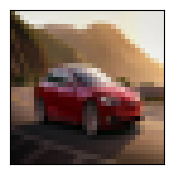

1/1 [==============================] - 0s 47ms/step
A nova imagem foi classificada como: automobile




imagem2.jpg
A largura da imagem é:  275
A altura da imagem é:  183


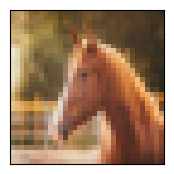

1/1 [==============================] - 0s 45ms/step
A nova imagem foi classificada como: horse




imagem3.jpg
A largura da imagem é:  750
A altura da imagem é:  450


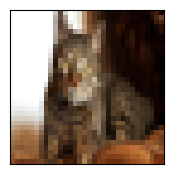

1/1 [==============================] - 0s 48ms/step
A nova imagem foi classificada como: cat




imagem4.jpg
A largura da imagem é:  900
A altura da imagem é:  506


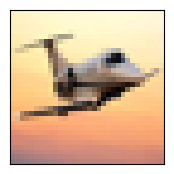

1/1 [==============================] - 0s 44ms/step
A nova imagem foi classificada como: airplane




imagem5.jpg
A largura da imagem é:  640
A altura da imagem é:  427


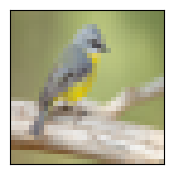

1/1 [==============================] - 0s 50ms/step
A nova imagem foi classificada como: bird




imagem6.jpg
A largura da imagem é:  600
A altura da imagem é:  399


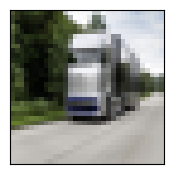

1/1 [==============================] - 0s 50ms/step
A nova imagem foi classificada como: truck






In [130]:
for arquivo in arquivos:
    
    print(arquivo)
    
    # Carrega uma nova imagem
    nova_imagem = Image.open(diretorio + arquivo)
    
    # Realiza o pre processamento da imagem a ser analizada
    nova_imagem_array = image_preprocessing(nova_imagem)
    
    # Aplica a previsao do modelo
    nome_classe_prevista = model_predict(nova_imagem_array)
    
    print("\n\n\n")